In [2]:
from steam_profile_games import obtener_juegos_steam
import pandas as pd
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
import seaborn as sns
from sklearn import metrics

In [3]:
API_KEY = '5EF8885FBA34D73C53DD4AF7564C44C7'

# URL del perfil de Steam
perfil_url = 'https://steamcommunity.com/id/MetalMaxALIZ/'

# Obtener el DataFrame con todos los juegos
df_juegos_propios = obtener_juegos_steam(perfil_url, API_KEY)

# Mostrar información
print(f"Total de juegos: {len(df_juegos_propios)}")
df_juegos_propios.head(10)

Total de juegos: 473


,app_id,nombre,tiempo_juego_minutos,img_icon_url,tiempo_windows_minutos,tiempo_mac_minutos,tiempo_linux_minutos,playtime_deck_forever,rtime_last_played,content_descriptorids,playtime_disconnected,has_community_visible_stats,has_leaderboards,tiempo_2semanas_minutos,tiempo_juego_horas,imagen_url,store_url
0,10,Counter-Strike,7707,https://media.steampowered.com/steamcommunity/...,0,0,0,0,1475882850,"[2, 5]",0,NaN,NaN,NaN,128.450000,https://cdn.cloudflare.steamstatic.com/steam/a...,https://store.steampowered.com/app/10
1,30,Day of Defeat,5,https://media.steampowered.com/steamcommunity/...,0,0,0,0,86400,"[2, 5]",0,NaN,NaN,NaN,0.083333,https://cdn.cloudflare.steamstatic.com/steam/a...,https://store.steampowered.com/app/30
2,40,Deathmatch Classic,20,https://media.steampowered.com/steamcommunity/...,0,0,0,0,86400,NaN,0,NaN,NaN,NaN,0.333333,https://cdn.cloudflare.steamstatic.com/steam/a...,https://store.steampowered.com/app/40
3,60,Ricochet,6,https://media.steampowered.com/steamcommunity/...,0,0,0,0,86400,NaN,0,NaN,NaN,NaN,0.100000,https://cdn.cloudflare.steamstatic.com/steam/a...,https://store.steampowered.com/app/60
4,80,Counter-Strike: Condition Zero,102,https://media.steampowered.com/steamcommunity/...,0,0,0,0,86400,"[2, 5]",0,NaN,NaN,NaN,1.700000,https://cdn.cloudflare.steamstatic.com/steam/a...,https://store.steampowered.com/app/80
5,100,Counter-Strike: Condition Zero Deleted Scenes,0,https://media.steampowered.com/steamcommunity/...,0,0,0,0,0,NaN,0,NaN,NaN,NaN,0.000000,https://cdn.cloudflare.steamstatic.com/steam/a...,https://store.steampowered.com/app/100
6,550,Left 4 Dead 2,507,https://media.steampowered.com/steamcommunity/...,0,0,0,0,1422303949,"[2, 5]",0,True,NaN,NaN,8.450000,https://cdn.cloudflare.steamstatic.com/steam/a...,https://store.steampowered.com/app/550
7,570,Dota 2,2553,https://media.steampowered.com/steamcommunity/...,37,0,0,0,1664845515,[5],0,NaN,NaN,NaN,42.550000,https://cdn.cloudflare.steamstatic.com/steam/a...,https://store.steampowered.com/app/570
8,620,Portal 2,376,https://media.steampowered.com/steamcommunity/...,0,0,0,0,1498957512,NaN,0,True,True,NaN,6.266667,https://cdn.cloudflare.steamstatic.com/steam/a...,https://store.steampowered.com/app/620
9,730,Counter-Strike 2,37285,https://media.steampowered.com/steamcommunity/...,9663,0,0,0,1704987692,"[2, 5]",0,True,NaN,NaN,621.416667,https://cdn.cloudflare.steamstatic.com/steam/a...,https://store.steampowered.com/app/730


In [4]:
# Nos quedamos solo con las columnas de interés 
columnas_interes = ['app_id', 'nombre', 'tiempo_juego_horas', 'imagen_url', 'store_url']
df_juegos_propios_filtrado = df_juegos_propios[columnas_interes]
df_juegos_propios_filtrado.shape


(473, 5)

In [5]:
df_juegos_propios_filtrado.head(10)

,app_id,nombre,tiempo_juego_horas,imagen_url,store_url
0,10,Counter-Strike,128.450000,https://cdn.cloudflare.steamstatic.com/steam/a...,https://store.steampowered.com/app/10
1,30,Day of Defeat,0.083333,https://cdn.cloudflare.steamstatic.com/steam/a...,https://store.steampowered.com/app/30
2,40,Deathmatch Classic,0.333333,https://cdn.cloudflare.steamstatic.com/steam/a...,https://store.steampowered.com/app/40
3,60,Ricochet,0.100000,https://cdn.cloudflare.steamstatic.com/steam/a...,https://store.steampowered.com/app/60
4,80,Counter-Strike: Condition Zero,1.700000,https://cdn.cloudflare.steamstatic.com/steam/a...,https://store.steampowered.com/app/80
5,100,Counter-Strike: Condition Zero Deleted Scenes,0.000000,https://cdn.cloudflare.steamstatic.com/steam/a...,https://store.steampowered.com/app/100
6,550,Left 4 Dead 2,8.450000,https://cdn.cloudflare.steamstatic.com/steam/a...,https://store.steampowered.com/app/550
7,570,Dota 2,42.550000,https://cdn.cloudflare.steamstatic.com/steam/a...,https://store.steampowered.com/app/570
8,620,Portal 2,6.266667,https://cdn.cloudflare.steamstatic.com/steam/a...,https://store.steampowered.com/app/620
9,730,Counter-Strike 2,621.416667,https://cdn.cloudflare.steamstatic.com/steam/a...,https://store.steampowered.com/app/730


In [6]:
# Eliminamos los que tengan el mismo nombre
df_juegos_propios_filtrado = df_juegos_propios_filtrado.drop_duplicates(subset=['nombre'])

In [7]:
# Convertimos df_juegos_propios_filtrado a un diccionario para facilitar la búsqueda
juegos_dict = df_juegos_propios_filtrado.set_index('nombre').T.to_dict('index')
juegos_dict

{'app_id': {'Counter-Strike': 10,
  'Day of Defeat': 30,
  'Deathmatch Classic': 40,
  'Ricochet': 60,
  'Counter-Strike: Condition Zero': 80,
  'Counter-Strike: Condition Zero Deleted Scenes': 100,
  'Left 4 Dead 2': 550,
  'Dota 2': 570,
  'Portal 2': 620,
  'Counter-Strike 2': 730,
  'Psychonauts': 3830,
  "Sid Meier's Civilization IV": 3900,
  "Sid Meier's Civilization III: Complete": 3910,
  "Sid Meier's Pirates!": 3920,
  "Sid Meier's Civilization IV: Warlords": 3990,
  "Garry's Mod": 4000,
  'Condemned: Criminal Origins': 4720,
  'Natural Selection 2': 4920,
  'Hitman 2: Silent Assassin': 6850,
  'Hitman: Codename 47': 6900,
  'X-Blades': 7510,
  'Two Worlds II HD': 7520,
  'Two Worlds II Castle Defense': 7530,
  "Sid Meier's Railroads!": 7600,
  'BioShock': 7670,
  'Kane & Lynch: Dead Men': 8080,
  'Just Cause 2': 8190,
  "Sid Meier's Civilization IV: Beyond the Sword": 8800,
  "Sid Meier's Civilization V": 8930,
  'Saints Row 2': 9480,
  'Overlord': 11450,
  'Overlord: Raising

------------------------------------

------------------------------------

In [8]:
# Crear un dataframe de juegos_rawg.db
from rawg_api_scraper_reintentos import obtener_dataframe_juegos
df_rawg = obtener_dataframe_juegos()
df_rawg

,id,name,background_image,metacritic,steam_store_id,genres,tags,fecha_extraccion
0,1,D/Generation HD,https://media.rawg.io/media/screenshots/5c4/5c...,NaN,19827,"Adventure, Puzzle","Singleplayer, Steam Achievements, Full control...",2025-11-25 14:05:45
1,2,Extreme Exorcism,https://media.rawg.io/media/screenshots/67d/67...,75.0,18705,"Action, Adventure, Casual, Indie","Singleplayer, Steam Achievements, Multiplayer,...",2025-11-25 13:59:13
2,3,Toto Temple Deluxe,https://media.rawg.io/media/screenshots/0af/0a...,NaN,23421,"Action, Casual, Indie","Singleplayer, Steam Achievements, Multiplayer,...",2025-11-25 14:06:44
3,4,Penarium,https://media.rawg.io/media/screenshots/68b/68...,80.0,19765,"Action, Arcade, Casual, Indie","Singleplayer, Steam Achievements, Full control...",2025-11-25 13:58:02
4,5,Standpoint,https://media.rawg.io/media/screenshots/238/23...,NaN,25258,"Action, Indie","Singleplayer, Steam Achievements, Full control...",2025-11-25 14:16:44
...,...,...,...,...,...,...,...,...
99068,1015265,Loutra: Inaugural Group Show,https://media.rawg.io/media/screenshots/c42/c4...,NaN,1017113,"RPG, Simulation, Casual, Indie","Singleplayer, Steam Achievements, Atmospheric,...",2025-11-25 15:38:02
99069,1015266,プレイすると死ぬゲーム,https://media.rawg.io/media/screenshots/4b6/4b...,NaN,1017114,Indie,"Singleplayer, 2D, Horror, 3D, Walking Simulato...",2025-11-25 15:38:02
99070,1015267,Stay in the rhythm,https://media.rawg.io/media/screenshots/9fd/9f...,NaN,1017115,"Action, Indie","Singleplayer, Steam Achievements, Steam Cloud,...",2025-11-25 15:38:02
99071,1015268,Mazebreach,https://media.rawg.io/media/screenshots/919/91...,NaN,1017116,Action,"Singleplayer, Stealth, Survival Horror, VR, Fa...",2025-11-25 15:38:02


In [9]:
# Eliminamos las columnas que no nos interesan
df_rawg = df_rawg.drop(columns=['fecha_extraccion', 'id', 'tags', 'metacritic', 'steam_store_id' ])

In [10]:
df_rawg

,name,background_image,genres
0,D/Generation HD,https://media.rawg.io/media/screenshots/5c4/5c...,"Adventure, Puzzle"
1,Extreme Exorcism,https://media.rawg.io/media/screenshots/67d/67...,"Action, Adventure, Casual, Indie"
2,Toto Temple Deluxe,https://media.rawg.io/media/screenshots/0af/0a...,"Action, Casual, Indie"
3,Penarium,https://media.rawg.io/media/screenshots/68b/68...,"Action, Arcade, Casual, Indie"
4,Standpoint,https://media.rawg.io/media/screenshots/238/23...,"Action, Indie"
...,...,...,...
99068,Loutra: Inaugural Group Show,https://media.rawg.io/media/screenshots/c42/c4...,"RPG, Simulation, Casual, Indie"
99069,プレイすると死ぬゲーム,https://media.rawg.io/media/screenshots/4b6/4b...,Indie
99070,Stay in the rhythm,https://media.rawg.io/media/screenshots/9fd/9f...,"Action, Indie"
99071,Mazebreach,https://media.rawg.io/media/screenshots/919/91...,Action


------------------------------------

------------------------------------

In [11]:
# Creamos un dataframe de steam_data.db
from SteamSpy import obtener_dataframe_steam_data
df_steam_spy = obtener_dataframe_steam_data()
df_steam_spy

,appid,name,developer,publisher,score_rank,positive,negative,userscore,owners,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,discount,ccu
0,730,Counter-Strike: Global Offensive,Valve,Valve,,7642084,1173003,0,"100,000,000 .. 200,000,000",33076,731,6137,295,0,0,0,1013936
1,1172470,Apex Legends,Respawn,Electronic Arts,,668053,326926,0,"100,000,000 .. 200,000,000",10632,622,962,250,0,0,0,124262
2,578080,PUBG: BATTLEGROUNDS,PUBG Corporation,"KRAFTON, Inc.",,1520457,1037487,0,"100,000,000 .. 200,000,000",23472,855,6057,316,0,0,0,314682
3,1623730,Palworld,Pocketpair,Pocketpair,,358266,22443,0,"50,000,000 .. 100,000,000",3799,689,2202,219,2999,2999,0,18028
4,440,Team Fortress 2,Valve,Valve,,1044264,117208,0,"50,000,000 .. 100,000,000",23714,330,4326,89,0,0,0,43819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86536,2571600,Meurtre Au Florian,"Nikoballz, PnDAa",Nikoballz,,7,2,0,"0 .. 20,000",0,0,0,0,499,499,0,0
86537,3223680,Rescue Girl Operation: Code X,2024-NGame,2024-NGame,,1,1,0,"0 .. 20,000",0,0,0,0,399,399,0,0
86538,3310110,Big Burger Tower,Frozen Logic Studios,Frozen Logic Studios,,2,1,0,"0 .. 20,000",0,0,0,0,399,399,0,0
86539,1589920,Long Ago: A Puzzle Tale,GrimTalin,GrimTalin,,15,2,0,"0 .. 20,000",0,0,0,0,499,499,0,0


In [12]:
# Nos quedamos solo con las columnas de interés 
columnas_interes_steam_spy = ['appid','name','positive','negative', 'owners']
df_steam_spy_interes = df_steam_spy[columnas_interes_steam_spy]
df_steam_spy_interes

,appid,name,positive,negative,owners
0,730,Counter-Strike: Global Offensive,7642084,1173003,"100,000,000 .. 200,000,000"
1,1172470,Apex Legends,668053,326926,"100,000,000 .. 200,000,000"
2,578080,PUBG: BATTLEGROUNDS,1520457,1037487,"100,000,000 .. 200,000,000"
3,1623730,Palworld,358266,22443,"50,000,000 .. 100,000,000"
4,440,Team Fortress 2,1044264,117208,"50,000,000 .. 100,000,000"
...,...,...,...,...,...
86536,2571600,Meurtre Au Florian,7,2,"0 .. 20,000"
86537,3223680,Rescue Girl Operation: Code X,1,1,"0 .. 20,000"
86538,3310110,Big Burger Tower,2,1,"0 .. 20,000"
86539,1589920,Long Ago: A Puzzle Tale,15,2,"0 .. 20,000"


In [13]:
# Reemplazamos los las filas que contengan el string None de la columna price por NaN
#import numpy as np
#df_steam_spy_interes['price'] = df_steam_spy_interes['price'].replace('None', np.nan)
#df_steam_spy_interes['initialprice'] = df_steam_spy_interes['initialprice'].replace('None', np.nan)
#df_steam_spy_interes.shape

In [14]:
# Borramos las filas con precios nulos ya que son muy pocas
#df_steam_spy_interes = df_steam_spy_interes.dropna(subset=['price', 'initialprice'])
#df_steam_spy_interes.shape

------------------------------------

------------------------------------

In [15]:
# combinar los dataset df_steam_spy y df_rawg_filtrado usando la columna name
df_combinado = pd.merge(df_steam_spy_interes, df_rawg, left_on='name', right_on='name', how='inner')
df_combinado.shape

(62015, 7)

In [16]:
df_combinado

,appid,name,positive,negative,owners,background_image,genres
0,730,Counter-Strike: Global Offensive,7642084,1173003,"100,000,000 .. 200,000,000",https://media.rawg.io/media/games/736/73619bd3...,Shooter
1,1172470,Apex Legends,668053,326926,"100,000,000 .. 200,000,000",https://media.rawg.io/media/games/737/737ea566...,"Action, Shooter"
2,1623730,Palworld,358266,22443,"50,000,000 .. 100,000,000",https://media.rawg.io/media/games/4e9/4e9c9514...,"Action, Adventure, RPG, Indie"
3,440,Team Fortress 2,1044264,117208,"50,000,000 .. 100,000,000",https://media.rawg.io/media/games/46d/46d98e69...,"Action, Shooter"
4,1938090,Call of Duty: Modern Warfare II,419594,294520,"50,000,000 .. 100,000,000",https://media.rawg.io/media/games/1af/1af8edc7...,"Action, Shooter"
...,...,...,...,...,...,...,...
62010,2571600,Meurtre Au Florian,7,2,"0 .. 20,000",https://media.rawg.io/media/screenshots/9bb/9b...,"Adventure, Indie"
62011,3223680,Rescue Girl Operation: Code X,1,1,"0 .. 20,000",https://media.rawg.io/media/screenshots/ccd/cc...,Adventure
62012,3310110,Big Burger Tower,2,1,"0 .. 20,000",https://media.rawg.io/media/screenshots/8f1/8f...,"Simulation, Casual"
62013,1589920,Long Ago: A Puzzle Tale,15,2,"0 .. 20,000",https://media.rawg.io/media/screenshots/73e/73...,Indie


In [17]:
# Cambiamos la columna 'price' y 'initialprice' a tipo int y las cambiamos a euros

#df_combinado['price'] = df_combinado['price'].astype(int) / 100
#df_combinado['initialprice'] = df_combinado['initialprice'].astype(int) / 100

#df_combinado['discount'] = df_combinado['discount'].astype(int)

In [18]:
df_combinado

,appid,name,positive,negative,owners,background_image,genres
0,730,Counter-Strike: Global Offensive,7642084,1173003,"100,000,000 .. 200,000,000",https://media.rawg.io/media/games/736/73619bd3...,Shooter
1,1172470,Apex Legends,668053,326926,"100,000,000 .. 200,000,000",https://media.rawg.io/media/games/737/737ea566...,"Action, Shooter"
2,1623730,Palworld,358266,22443,"50,000,000 .. 100,000,000",https://media.rawg.io/media/games/4e9/4e9c9514...,"Action, Adventure, RPG, Indie"
3,440,Team Fortress 2,1044264,117208,"50,000,000 .. 100,000,000",https://media.rawg.io/media/games/46d/46d98e69...,"Action, Shooter"
4,1938090,Call of Duty: Modern Warfare II,419594,294520,"50,000,000 .. 100,000,000",https://media.rawg.io/media/games/1af/1af8edc7...,"Action, Shooter"
...,...,...,...,...,...,...,...
62010,2571600,Meurtre Au Florian,7,2,"0 .. 20,000",https://media.rawg.io/media/screenshots/9bb/9b...,"Adventure, Indie"
62011,3223680,Rescue Girl Operation: Code X,1,1,"0 .. 20,000",https://media.rawg.io/media/screenshots/ccd/cc...,Adventure
62012,3310110,Big Burger Tower,2,1,"0 .. 20,000",https://media.rawg.io/media/screenshots/8f1/8f...,"Simulation, Casual"
62013,1589920,Long Ago: A Puzzle Tale,15,2,"0 .. 20,000",https://media.rawg.io/media/screenshots/73e/73...,Indie


In [19]:
# Hacemos one hot encoding de la columna 'genres' del dataframe df_combinado
df_combinado_generos = pd.get_dummies(df_combinado['genres'].str.split(', ').explode()).groupby(level=0).sum()
df_combinado_final = pd.concat([df_combinado, df_combinado_generos], axis=1)
df_combinado_final

,appid,name,positive,negative,owners,background_image,genres,Action,Adventure,Arcade,...,Indie,Massively Multiplayer,Platformer,Puzzle,RPG,Racing,Shooter,Simulation,Sports,Strategy
0,730,Counter-Strike: Global Offensive,7642084,1173003,"100,000,000 .. 200,000,000",https://media.rawg.io/media/games/736/73619bd3...,Shooter,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1172470,Apex Legends,668053,326926,"100,000,000 .. 200,000,000",https://media.rawg.io/media/games/737/737ea566...,"Action, Shooter",1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1623730,Palworld,358266,22443,"50,000,000 .. 100,000,000",https://media.rawg.io/media/games/4e9/4e9c9514...,"Action, Adventure, RPG, Indie",1,1,0,...,1,0,0,0,1,0,0,0,0,0
3,440,Team Fortress 2,1044264,117208,"50,000,000 .. 100,000,000",https://media.rawg.io/media/games/46d/46d98e69...,"Action, Shooter",1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1938090,Call of Duty: Modern Warfare II,419594,294520,"50,000,000 .. 100,000,000",https://media.rawg.io/media/games/1af/1af8edc7...,"Action, Shooter",1,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62010,2571600,Meurtre Au Florian,7,2,"0 .. 20,000",https://media.rawg.io/media/screenshots/9bb/9b...,"Adventure, Indie",0,1,0,...,1,0,0,0,0,0,0,0,0,0
62011,3223680,Rescue Girl Operation: Code X,1,1,"0 .. 20,000",https://media.rawg.io/media/screenshots/ccd/cc...,Adventure,0,1,0,...,0,0,0,0,0,0,0,0,0,0
62012,3310110,Big Burger Tower,2,1,"0 .. 20,000",https://media.rawg.io/media/screenshots/8f1/8f...,"Simulation, Casual",0,0,0,...,0,0,0,0,0,0,0,1,0,0
62013,1589920,Long Ago: A Puzzle Tale,15,2,"0 .. 20,000",https://media.rawg.io/media/screenshots/73e/73...,Indie,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [20]:
# Sacamos un porcentaje de votos positivos enbase a las columnas positive y negative y los dejamos con dos decimales
df_combinado_final['porcentaje_votos_positivos'] = (df_combinado_final['positive'].astype(float) / (df_combinado_final['positive'].astype(float) + df_combinado_final['negative'].astype(float)) * 100).round(2)
df_combinado_final

,appid,name,positive,negative,owners,background_image,genres,Action,Adventure,Arcade,...,Massively Multiplayer,Platformer,Puzzle,RPG,Racing,Shooter,Simulation,Sports,Strategy,porcentaje_votos_positivos
0,730,Counter-Strike: Global Offensive,7642084,1173003,"100,000,000 .. 200,000,000",https://media.rawg.io/media/games/736/73619bd3...,Shooter,0,0,0,...,0,0,0,0,0,1,0,0,0,86.69
1,1172470,Apex Legends,668053,326926,"100,000,000 .. 200,000,000",https://media.rawg.io/media/games/737/737ea566...,"Action, Shooter",1,0,0,...,0,0,0,0,0,1,0,0,0,67.14
2,1623730,Palworld,358266,22443,"50,000,000 .. 100,000,000",https://media.rawg.io/media/games/4e9/4e9c9514...,"Action, Adventure, RPG, Indie",1,1,0,...,0,0,0,1,0,0,0,0,0,94.10
3,440,Team Fortress 2,1044264,117208,"50,000,000 .. 100,000,000",https://media.rawg.io/media/games/46d/46d98e69...,"Action, Shooter",1,0,0,...,0,0,0,0,0,1,0,0,0,89.91
4,1938090,Call of Duty: Modern Warfare II,419594,294520,"50,000,000 .. 100,000,000",https://media.rawg.io/media/games/1af/1af8edc7...,"Action, Shooter",1,0,0,...,0,0,0,0,0,1,0,0,0,58.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62010,2571600,Meurtre Au Florian,7,2,"0 .. 20,000",https://media.rawg.io/media/screenshots/9bb/9b...,"Adventure, Indie",0,1,0,...,0,0,0,0,0,0,0,0,0,77.78
62011,3223680,Rescue Girl Operation: Code X,1,1,"0 .. 20,000",https://media.rawg.io/media/screenshots/ccd/cc...,Adventure,0,1,0,...,0,0,0,0,0,0,0,0,0,50.00
62012,3310110,Big Burger Tower,2,1,"0 .. 20,000",https://media.rawg.io/media/screenshots/8f1/8f...,"Simulation, Casual",0,0,0,...,0,0,0,0,0,0,1,0,0,66.67
62013,1589920,Long Ago: A Puzzle Tale,15,2,"0 .. 20,000",https://media.rawg.io/media/screenshots/73e/73...,Indie,0,0,0,...,0,0,0,0,0,0,0,0,0,88.24


In [21]:
# Cambiamos los datos de la columna 'owners' para que en vez de un rango de personas que tienen el juego, tengamos un valor numérico que sea la media del rango. Por ejemplo si el campo contiene '500,000 .. 1,000,000' lo cambiariamos a 750000
def calcular_media_owners(rango):
    partes = rango.split(' .. ')
    if len(partes) == 2:
        min_owners = int(partes[0].replace(',', ''))
        max_owners = int(partes[1].replace(',', ''))
        return (min_owners + max_owners) // 2
    return np.nan
df_combinado_final['owners'] = df_combinado_final['owners'].apply(calcular_media_owners)
df_combinado_final



,appid,name,positive,negative,owners,background_image,genres,Action,Adventure,Arcade,...,Massively Multiplayer,Platformer,Puzzle,RPG,Racing,Shooter,Simulation,Sports,Strategy,porcentaje_votos_positivos
0,730,Counter-Strike: Global Offensive,7642084,1173003,150000000,https://media.rawg.io/media/games/736/73619bd3...,Shooter,0,0,0,...,0,0,0,0,0,1,0,0,0,86.69
1,1172470,Apex Legends,668053,326926,150000000,https://media.rawg.io/media/games/737/737ea566...,"Action, Shooter",1,0,0,...,0,0,0,0,0,1,0,0,0,67.14
2,1623730,Palworld,358266,22443,75000000,https://media.rawg.io/media/games/4e9/4e9c9514...,"Action, Adventure, RPG, Indie",1,1,0,...,0,0,0,1,0,0,0,0,0,94.10
3,440,Team Fortress 2,1044264,117208,75000000,https://media.rawg.io/media/games/46d/46d98e69...,"Action, Shooter",1,0,0,...,0,0,0,0,0,1,0,0,0,89.91
4,1938090,Call of Duty: Modern Warfare II,419594,294520,75000000,https://media.rawg.io/media/games/1af/1af8edc7...,"Action, Shooter",1,0,0,...,0,0,0,0,0,1,0,0,0,58.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62010,2571600,Meurtre Au Florian,7,2,10000,https://media.rawg.io/media/screenshots/9bb/9b...,"Adventure, Indie",0,1,0,...,0,0,0,0,0,0,0,0,0,77.78
62011,3223680,Rescue Girl Operation: Code X,1,1,10000,https://media.rawg.io/media/screenshots/ccd/cc...,Adventure,0,1,0,...,0,0,0,0,0,0,0,0,0,50.00
62012,3310110,Big Burger Tower,2,1,10000,https://media.rawg.io/media/screenshots/8f1/8f...,"Simulation, Casual",0,0,0,...,0,0,0,0,0,0,1,0,0,66.67
62013,1589920,Long Ago: A Puzzle Tale,15,2,10000,https://media.rawg.io/media/screenshots/73e/73...,Indie,0,0,0,...,0,0,0,0,0,0,0,0,0,88.24


In [22]:
df_combinado_final.columns

Index(['appid', 'name', 'positive', 'negative', 'owners', 'background_image',
       'genres', 'Action', 'Adventure', 'Arcade', 'Board Games', 'Card',
       'Casual', 'Educational', 'Family', 'Fighting', 'Indie',
       'Massively Multiplayer', 'Platformer', 'Puzzle', 'RPG', 'Racing',
       'Shooter', 'Simulation', 'Sports', 'Strategy',
       'porcentaje_votos_positivos'],
      dtype='object')

In [23]:
# Seleccionar las columnas para el modelo KNN
columnas_modelo = ['owners', 'Action', 'Adventure', 'Arcade', 'Board Games', 'Card',
                   'Casual', 'Educational', 'Family', 'Fighting', 'Indie',
                   'Massively Multiplayer', 'Platformer', 'Puzzle', 'RPG', 'Racing',
                   'Shooter', 'Simulation', 'Sports', 'Strategy', 'porcentaje_votos_positivos']

# Crear DataFrame solo con las columnas del modelo
df_modelo = df_combinado_final[columnas_modelo].copy()

# Eliminar filas con valores nulos
df_modelo = df_modelo.dropna()

print(f"Datos para el modelo: {df_modelo.shape}")
print(f"\nPrimeras filas:")
df_modelo.head()

Datos para el modelo: (61703, 21)

Primeras filas:


,owners,Action,Adventure,Arcade,Board Games,Card,Casual,Educational,Family,Fighting,...,Massively Multiplayer,Platformer,Puzzle,RPG,Racing,Shooter,Simulation,Sports,Strategy,porcentaje_votos_positivos
0,150000000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,86.69
1,150000000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,67.14
2,75000000,1,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,94.10
3,75000000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,89.91
4,75000000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,58.76


In [24]:
df_modelo.columns

Index(['owners', 'Action', 'Adventure', 'Arcade', 'Board Games', 'Card',
       'Casual', 'Educational', 'Family', 'Fighting', 'Indie',
       'Massively Multiplayer', 'Platformer', 'Puzzle', 'RPG', 'Racing',
       'Shooter', 'Simulation', 'Sports', 'Strategy',
       'porcentaje_votos_positivos'],
      dtype='object')

In [25]:
# Normalizar los datos para KNN (importante porque usa distancias)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_modelo_normalizado = scaler.fit_transform(df_modelo)

print(f"Datos normalizados: {df_modelo_normalizado.shape}")
print(f"\nMedia de cada feature (debe ser ~0): {df_modelo_normalizado.mean(axis=0)[:5]}")
print(f"Desviación estándar (debe ser ~1): {df_modelo_normalizado.std(axis=0)[:5]}")

Datos normalizados: (61703, 21)

Media de cada feature (debe ser ~0): [ 7.36993908e-18  0.00000000e+00 -1.84248477e-18 -4.79046040e-17
  1.65823629e-17]
Desviación estándar (debe ser ~1): [1. 1. 1. 1. 1.]


In [26]:
df_modelo_normalizado

array([[ 9.87884837e+01, -8.68028857e-01, -8.35817289e-01, ...,
        -2.15774343e-01, -5.11406159e-01,  4.47046693e-01],
       [ 9.87884837e+01,  1.15203543e+00, -8.35817289e-01, ...,
        -2.15774343e-01, -5.11406159e-01, -4.10252188e-01],
       [ 4.93475248e+01,  1.15203543e+00,  1.19643373e+00, ...,
        -2.15774343e-01, -5.11406159e-01,  7.71987087e-01],
       ...,
       [-8.68419336e-02, -8.68028857e-01, -8.35817289e-01, ...,
        -2.15774343e-01, -5.11406159e-01, -4.30862442e-01],
       [-8.68419336e-02, -8.68028857e-01, -8.35817289e-01, ...,
        -2.15774343e-01, -5.11406159e-01,  5.15016681e-01],
       [-8.68419336e-02, -8.68028857e-01, -8.35817289e-01, ...,
        -2.15774343e-01, -5.11406159e-01,  1.03071156e+00]],
      shape=(61703, 21))

In [27]:
# Crear el modelo KNN
# Probar con diferentes valores de k para encontrar el óptimo


# Usar k=10 como valor inicial
k_optimo = 15000
knn_modelo = NearestNeighbors(n_neighbors=k_optimo, metric='euclidean')
knn_modelo.fit(df_modelo_normalizado)

print(f"\n✓ Modelo KNN entrenado con k={k_optimo}")
print(f"Total de juegos en el modelo: {len(df_modelo)}")


✓ Modelo KNN entrenado con k=15000
Total de juegos en el modelo: 61703


In [28]:

# Función para recomendar juegos similares basándose en juegos del diccionario juegos_dict
def recomendar_juegos(nombres_juegos, n_recomendaciones=10):
    """
        nombres_juegos: Nombre del juego o lista de nombres de juegos del diccionario juegos_dict
        n_recomendaciones: Número de juegos similares a recomendar
        
    """

    # Convertir a lista si es un solo nombre
    if isinstance(nombres_juegos, str):
        nombres_juegos = [nombres_juegos]
    
    # Obtener los índices de los juegos en df_combinado_final
    indices_juegos = []
    for nombre in nombres_juegos:
        if nombre in juegos_dict['app_id']:
            app_id = juegos_dict['app_id'][nombre]
            # Buscar el índice en df_combinado_final
            mask = df_combinado_final['appid'] == str(app_id)
            if mask.any():
                idx = df_combinado_final[mask].index[0]
                # Verificar si ese índice está en df_modelo
                if idx in df_modelo.index:
                    indice_en_modelo = df_modelo.index.get_loc(idx)
                    indices_juegos.append(indice_en_modelo)
                    print(f"✓ Juego encontrado: {nombre} (app_id: {app_id})")
                else:
                    print(f"✗ El juego '{nombre}' no está en el modelo")
            else:
                print(f"✗ El juego '{nombre}' no está en df_combinado_final")
        else:
            print(f"✗ El juego '{nombre}' no está en juegos_dict")
    
    if len(indices_juegos) == 0:
        print("\nNo se encontraron juegos válidos para hacer recomendaciones.")
        return None
    
    print(f"\n{len(indices_juegos)} juego(s) usado(s) para recomendaciones")
    print("="*70 + "\n")
    
    # Obtener los vectores de los juegos
    juegos_vectores = df_modelo_normalizado[indices_juegos]
    
    # Calcular el centroide (promedio) de todos los juegos
    centroide = juegos_vectores.mean(axis=0).reshape(1, -1)
    
    # Encontrar los vecinos más cercanos al centroide
    distancias, indices = knn_modelo.kneighbors(centroide, n_neighbors=n_recomendaciones + len(indices_juegos)) # n_recomendaciones + len(indices_juegos)
    
    # Excluir los juegos de entrada de las recomendaciones
    indices_recomendados = []
    distancias_recomendadas = []
    
    for i, idx in enumerate(indices[0]):
        # Excluir si es uno de los juegos de entrada
        if idx not in indices_juegos:
            indices_recomendados.append(idx)
            distancias_recomendadas.append(distancias[0][i])
        
        # Detenerse cuando tengamos suficientes recomendaciones
        if len(indices_recomendados) == n_recomendaciones:
            break
    
    indices_originales = df_modelo.index[indices_recomendados].tolist()
    
    # Obtener información de los juegos recomendados
    juegos_recomendados = df_combinado_final.loc[indices_originales][['appid', 'name', 'genres', 'owners', 'porcentaje_votos_positivos']].copy()
    juegos_recomendados['similitud'] = 1 / (1 + np.array(distancias_recomendadas))

    return juegos_recomendados



In [29]:
# Prueba 
print("Recomendaciones basadas en 'Counter-Strike' y 'Left 4 Dead 2':\n")
recomendaciones = recomendar_juegos(["Counter-Strike","Left 4 Dead 2","Mind Over Magic","Don't Starve","Terraria", "Stardew Valley"], n_recomendaciones=10)
recomendaciones

Recomendaciones basadas en 'Counter-Strike' y 'Left 4 Dead 2':

✓ Juego encontrado: Counter-Strike (app_id: 10)
✓ Juego encontrado: Left 4 Dead 2 (app_id: 550)
✓ Juego encontrado: Mind Over Magic (app_id: 1270580)
✓ Juego encontrado: Don't Starve (app_id: 219740)
✓ Juego encontrado: Terraria (app_id: 105600)
✓ Juego encontrado: Stardew Valley (app_id: 413150)

6 juego(s) usado(s) para recomendaciones



,appid,name,genres,owners,porcentaje_votos_positivos,similitud
30,340,Half-Life 2: Lost Coast,Action,35000000,89.25,0.138325
32,381210,Dead by Daylight,Action,35000000,79.05,0.137619
21,552990,World of Warships,Action,35000000,77.03,0.137409
11,553850,HELLDIVERS 2,Action,35000000,76.24,0.137321
25,1491000,War Robots: Frontiers,"Action, Simulation",35000000,64.15,0.132752
24,242760,The Forest,"Action, Adventure, Indie",35000000,95.54,0.132522
15,431960,Wallpaper Engine,Casual,35000000,98.04,0.132452
35,292030,The Witcher 3: Wild Hunt,"Action, RPG",35000000,96.13,0.132220
33,990080,Hogwarts Legacy,"Action, RPG",35000000,90.22,0.132136
28,901583,Grand Theft Auto IV: Complete Edition,"Action, Adventure",35000000,82.48,0.132057


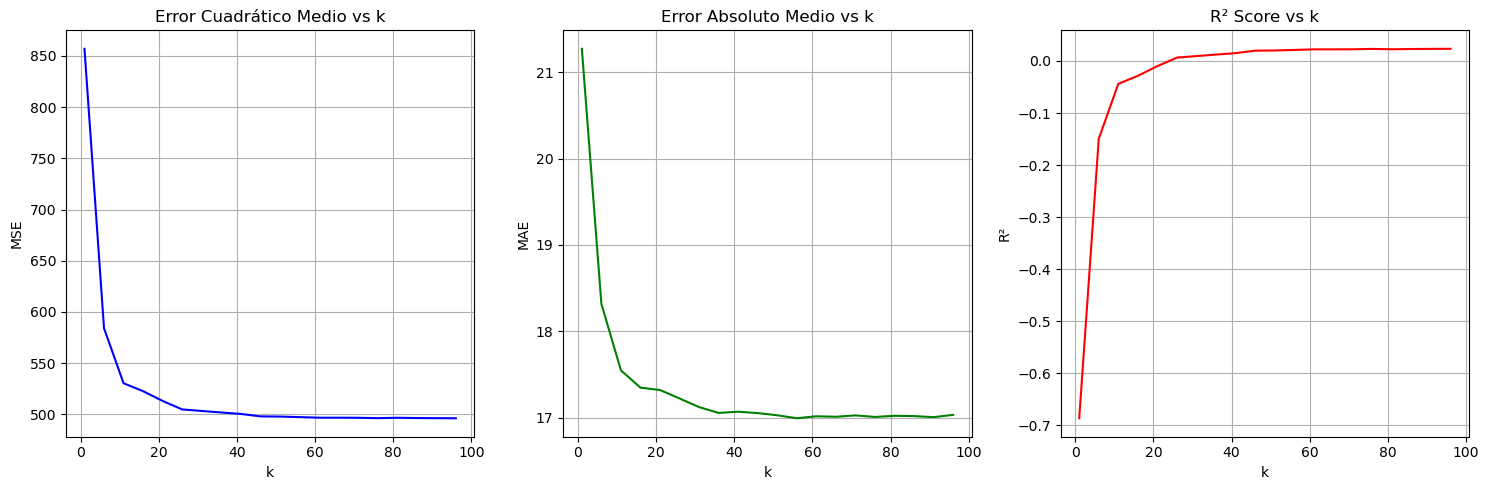

Mejor k (menor MSE): 96 con MSE = 496.15
Mejor k (mayor R²): 96 con R² = 0.0234
MAE promedio: 17.37


In [30]:
# Mostras las metricas del modelo KNN, accuracy, precision, recall, f1-score y la matriz de confusión
# NOTA: KNN es un modelo de recomendación basado en vecinos, no un clasificador, por lo que las métricas tradicionales no aplican directamente.
# Sin embargo, podemos evaluar la calidad de las recomendaciones mediante técnicas como validación cruzada o análisis de la distancia entre vecinos.
# Aquí simplemente mostramos un ejemplo de cómo se podrían calcular estas métricas si tuviéramos etiquetas verdaderas.
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X = df_modelo.drop('porcentaje_votos_positivos', axis=1)
y = df_modelo['porcentaje_votos_positivos']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mse_scores = []
mae_scores = []
r2_scores = []

k_range = range(1, 101, 5)
for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    mse_scores.append(mean_squared_error(y_test, y_pred))
    mae_scores.append(mean_absolute_error(y_test, y_pred))
    r2_scores.append(r2_score(y_test, y_pred))

# Visualizar las métricas
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(k_range, mse_scores, color='blue')
plt.xlabel('k')
plt.ylabel('MSE')
plt.title('Error Cuadrático Medio vs k')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(k_range, mae_scores, color='green')
plt.xlabel('k')
plt.ylabel('MAE')
plt.title('Error Absoluto Medio vs k')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(k_range, r2_scores, color='red')
plt.xlabel('k')
plt.ylabel('R²')
plt.title('R² Score vs k')
plt.grid(True)

plt.tight_layout()
plt.show()

# Mostrar los mejores valores
mejor_k_mse = k_range[np.argmin(mse_scores)]
mejor_k_r2 = k_range[np.argmax(r2_scores)]

print(f"Mejor k (menor MSE): {mejor_k_mse} con MSE = {min(mse_scores):.2f}")
print(f"Mejor k (mayor R²): {mejor_k_r2} con R² = {max(r2_scores):.4f}")
print(f"MAE promedio: {np.mean(mae_scores):.2f}")



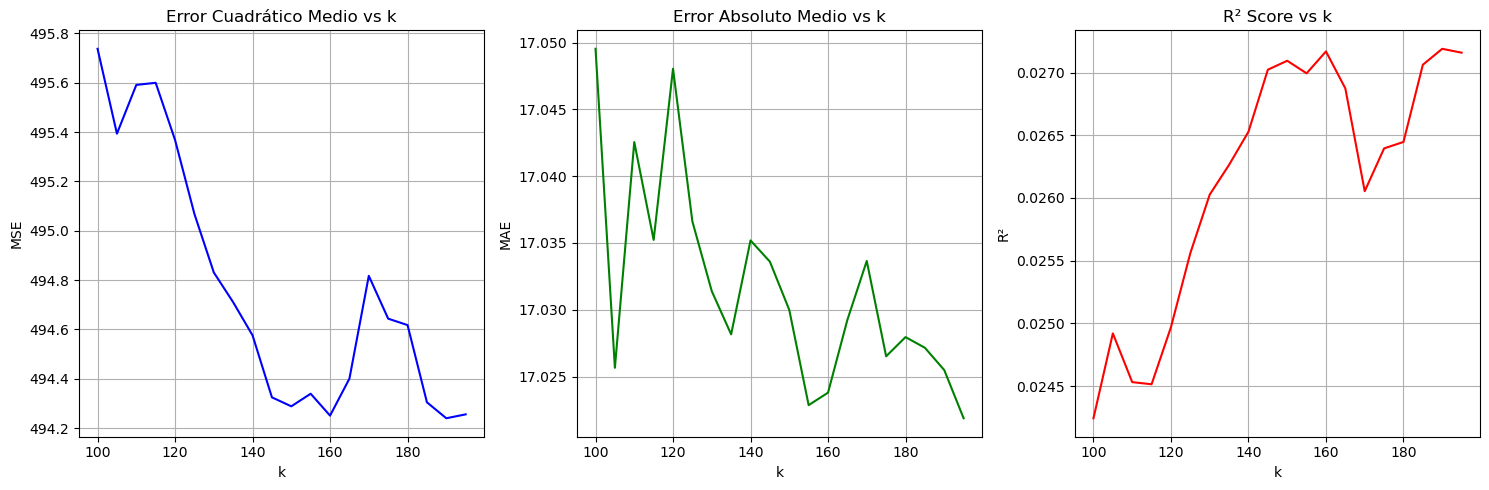

Mejor k (menor MSE): 190 con MSE = 494.24
Mejor k (mayor R²): 190 con R² = 0.0272
MAE promedio: 17.03


In [31]:
# Mostras las metricas del modelo KNN, accuracy, precision, recall, f1-score y la matriz de confusión
# NOTA: KNN es un modelo de recomendación basado en vecinos, no un clasificador, por lo que las métricas tradicionales no aplican directamente.
# Sin embargo, podemos evaluar la calidad de las recomendaciones mediante técnicas como validación cruzada o análisis de la distancia entre vecinos.
# Aquí simplemente mostramos un ejemplo de cómo se podrían calcular estas métricas si tuviéramos etiquetas verdaderas.
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X = df_modelo.drop('porcentaje_votos_positivos', axis=1)
y = df_modelo['porcentaje_votos_positivos']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mse_scores = []
mae_scores = []
r2_scores = []

k_range = range(100, 200, 5)
for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    mse_scores.append(mean_squared_error(y_test, y_pred))
    mae_scores.append(mean_absolute_error(y_test, y_pred))
    r2_scores.append(r2_score(y_test, y_pred))

# Visualizar las métricas
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(k_range, mse_scores, color='blue')
plt.xlabel('k')
plt.ylabel('MSE')
plt.title('Error Cuadrático Medio vs k')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(k_range, mae_scores, color='green')
plt.xlabel('k')
plt.ylabel('MAE')
plt.title('Error Absoluto Medio vs k')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(k_range, r2_scores, color='red')
plt.xlabel('k')
plt.ylabel('R²')
plt.title('R² Score vs k')
plt.grid(True)

plt.tight_layout()
plt.show()

# Mostrar los mejores valores
mejor_k_mse = k_range[np.argmin(mse_scores)]
mejor_k_r2 = k_range[np.argmax(r2_scores)]

print(f"Mejor k (menor MSE): {mejor_k_mse} con MSE = {min(mse_scores):.2f}")
print(f"Mejor k (mayor R²): {mejor_k_r2} con R² = {max(r2_scores):.4f}")
print(f"MAE promedio: {np.mean(mae_scores):.2f}")



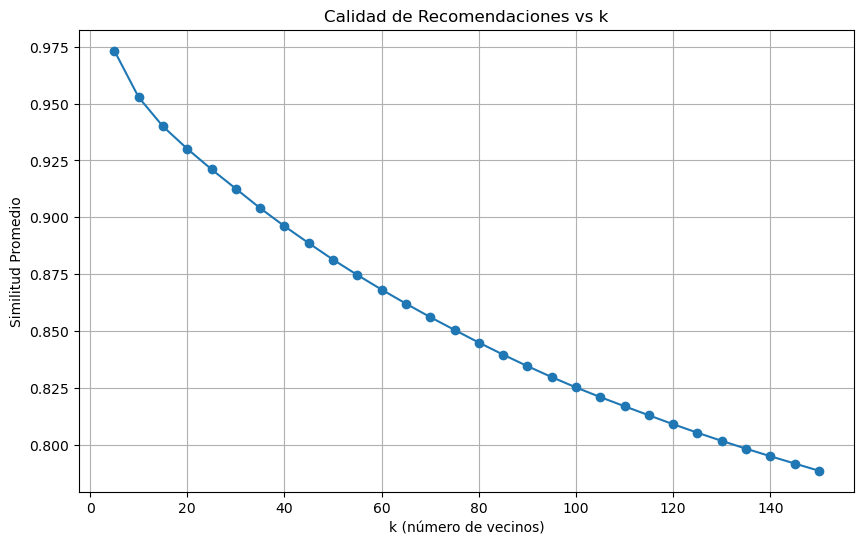

Mejor k para recomendaciones: 5


In [32]:
# Evaluar la calidad de las recomendaciones
from sklearn.metrics.pairwise import cosine_similarity

# Seleccionar juegos de prueba aleatorios
np.random.seed(42)
indices_prueba = np.random.choice(len(df_modelo), size=100, replace=False)

similitudes_promedio = []
k_range = range(5, 151, 5)

for k in k_range:
    knn_temp = NearestNeighbors(n_neighbors=k, metric='euclidean')
    knn_temp.fit(df_modelo_normalizado)
    
    similitudes = []
    for idx in indices_prueba:
        distancias, _ = knn_temp.kneighbors([df_modelo_normalizado[idx]])
        # Similitud promedio (inverso de la distancia)
        similitud_prom = 1 / (1 + distancias[0].mean())
        similitudes.append(similitud_prom)
    
    similitudes_promedio.append(np.mean(similitudes))

plt.figure(figsize=(10, 6))
plt.plot(k_range, similitudes_promedio, marker='o')
plt.xlabel('k (número de vecinos)')
plt.ylabel('Similitud Promedio')
plt.title('Calidad de Recomendaciones vs k')
plt.grid(True)
plt.show()

mejor_k = k_range[np.argmax(similitudes_promedio)]
print(f"Mejor k para recomendaciones: {mejor_k}")

# Exportar Modelo para el Frontend

Ejecuta la siguiente celda para exportar todos los datos necesarios para el sistema de recomendaciones en la aplicación web.

In [33]:
# Exportar modelo para el backend del frontend
import pickle
import os

# Crear directorio data si no existe
data_path = './data'
os.makedirs(data_path, exist_ok=True)

print("Exportando modelo y datos...")
print("="*70)

# Guardar DataFrames
df_combinado_final.to_pickle(os.path.join(data_path, 'df_combinado_final.pkl'))
print("✓ df_combinado_final guardado")

df_modelo.to_pickle(os.path.join(data_path, 'df_modelo.pkl'))
print("✓ df_modelo guardado")

# Guardar array normalizado
with open(os.path.join(data_path, 'df_modelo_normalizado.pkl'), 'wb') as f:
    pickle.dump(df_modelo_normalizado, f)
print("✓ df_modelo_normalizado guardado")

# Guardar modelo KNN
with open(os.path.join(data_path, 'knn_modelo.pkl'), 'wb') as f:
    pickle.dump(knn_modelo, f)
print("✓ knn_modelo guardado")

# Guardar diccionario de juegos
with open(os.path.join(data_path, 'juegos_dict.pkl'), 'wb') as f:
    pickle.dump(juegos_dict, f)
print("✓ juegos_dict guardado")

print("="*70)
print("¡Todos los datos se guardaron correctamente!")
print(f"Ubicación: {os.path.abspath(data_path)}")
print("\nAhora puedes ejecutar el backend con: python backend/app.py")
print("Y el frontend con: npm start (desde la carpeta frontend)")

Exportando modelo y datos...
✓ df_combinado_final guardado
✓ df_modelo guardado
✓ df_modelo_normalizado guardado
✓ knn_modelo guardado
✓ juegos_dict guardado
¡Todos los datos se guardaron correctamente!
Ubicación: d:\CURSO\Proyecto_con_FrontEnd\Proyecto_con_FrontEnd\data

Ahora puedes ejecutar el backend con: python backend/app.py
Y el frontend con: npm start (desde la carpeta frontend)
